In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Amroy\Downloads\archive (10)\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

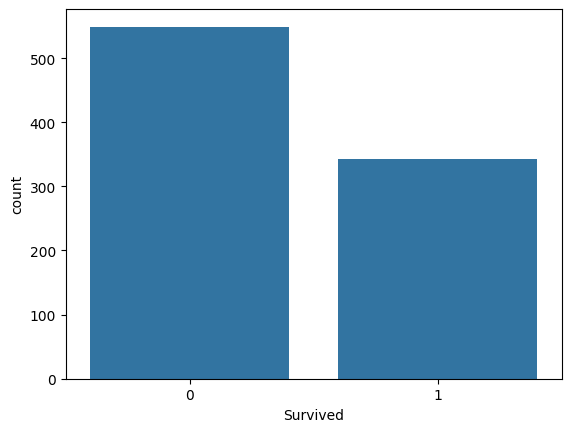

In [5]:
sns.countplot(data=df,x="Survived")

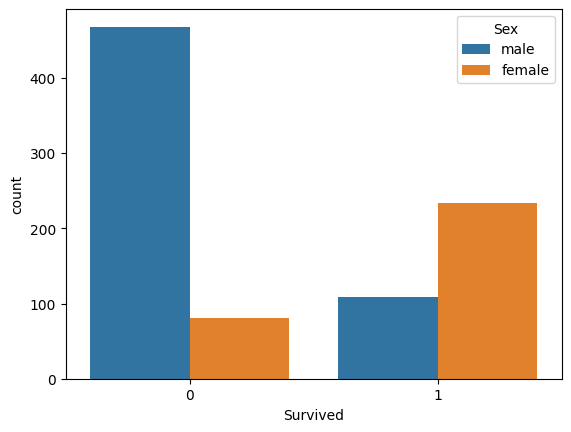

In [6]:
sns.countplot(data=df,x="Survived",hue="Sex")
plt.show()

In [7]:
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


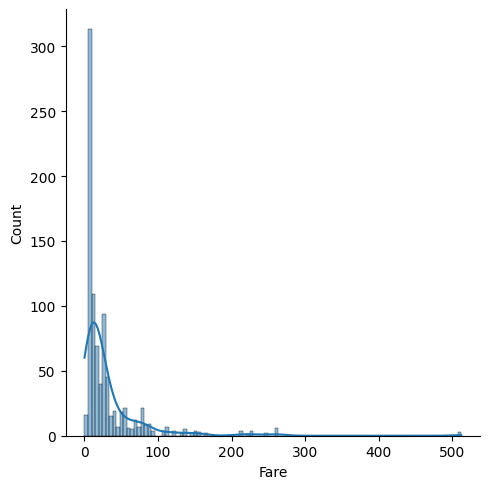

In [8]:
sns.displot(data=df,kde=True,x="Fare")
plt.show()

In [9]:
df.shape

(891, 12)

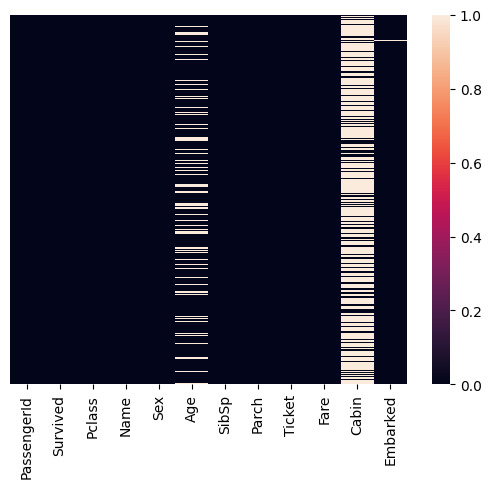

In [10]:
sns.heatmap(df.isnull(),yticklabels=False)
plt.show()

In [11]:
df.drop(["Name","Cabin","PassengerId","Ticket"],inplace=True,axis=1)

In [12]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [13]:
df['Age'].mean()

29.69911764705882

In [14]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [15]:
df.loc[df['Pclass']==3,'Age'] = df.loc[df['Pclass']==3,'Age'].fillna(38)

In [16]:
df.loc[df['Pclass']==2,'Age']= df.loc[df['Pclass']==2,'Age'].fillna(28)

In [17]:
df.loc[df['Pclass']==1,"Age"] = df.loc[df['Pclass']==1,"Age"].fillna(23)

In [18]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [19]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [20]:
df.dropna(inplace= True)
#df.drop([61,829])

In [21]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
cat_col = df.select_dtypes(['object']).columns
cat_col

Index(['Sex', 'Embarked'], dtype='object')

In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
oe = OrdinalEncoder()

In [25]:
df[cat_col]= oe.fit_transform(df[cat_col])

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,13.0000,2.0
887,1,1,0.0,19.0,0,0,30.0000,2.0
888,0,3,0.0,38.0,1,2,23.4500,2.0
889,1,1,1.0,26.0,0,0,30.0000,0.0


In [27]:
from sklearn.model_selection import train_test_split
from tensorflow import keras as kr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
x= df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]


In [29]:
y=df['Survived']


In [30]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=1)

In [31]:
print(f"xtrain: {len(xtrain)},ytrain: {len(ytrain)},xtest: {len(xtest)},ytest: {len(ytest)}")

xtrain: 622,ytrain: 622,xtest: 267,ytest: 267


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
ss = StandardScaler()

In [34]:
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [36]:
xtrain,xtest

(array([[ 0.81254446,  0.72681189, -0.71238456, ..., -0.46839312,
         -0.5414935 ,  0.57248025],
        [-0.39945231, -1.37587182, -0.20197429, ..., -0.46839312,
         -0.14100326, -1.98008403],
        [ 0.81254446,  0.72681189,  0.52718323, ..., -0.46839312,
         -0.53837927,  0.57248025],
        ...,
        [ 0.81254446,  0.72681189, -0.34780579, ..., -0.46839312,
         -0.37882595, -1.98008403],
        [-0.39945231,  0.72681189,  0.96467775, ..., -0.46839312,
         -0.09117554,  0.57248025],
        [ 0.81254446,  0.72681189, -0.71238456, ..., -0.46839312,
         -0.53837927,  0.57248025]]),
 array([[-0.39945231, -1.37587182,  0.38135173, ..., -0.46839312,
         -0.41505568,  0.57248025],
        [-0.39945231, -1.37587182,  1.40217226, ...,  0.72562541,
         -0.09117554,  0.57248025],
        [ 0.81254446,  0.72681189,  1.25634076, ..., -0.46839312,
         -0.54325741,  0.57248025],
        ...,
        [ 0.81254446, -1.37587182,  0.52718323, ..., -

In [38]:
x.shape

(889, 7)

In [40]:
model = kr.Sequential([
    kr.layers.Dense(units=8,activation="relu",input_shape=(x.shape[1],)),
    kr.layers.Dense(units=1,activation="sigmoid")
])

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.get_weights()

[array([[ 0.04062605, -0.04040819,  0.0373292 ,  0.6185089 ,  0.4152673 ,
         -0.34763157,  0.374821  ,  0.06104475],
        [-0.59861183,  0.20167202,  0.5053219 ,  0.44054335,  0.40451294,
          0.03217584, -0.17442504,  0.022416  ],
        [ 0.46248657, -0.22385344, -0.41209784, -0.39937156,  0.46931416,
         -0.3728883 ,  0.33811647,  0.29718357],
        [-0.08646792, -0.04489386, -0.34671357,  0.5035998 ,  0.53588897,
         -0.5407064 ,  0.36908752, -0.08613271],
        [ 0.12047839,  0.29881674, -0.6223302 , -0.30488572, -0.56709415,
          0.05627328, -0.5354883 , -0.5065906 ],
        [-0.07541764,  0.3463719 ,  0.22633678, -0.5829097 , -0.4800225 ,
         -0.12100375,  0.5933984 ,  0.52323824],
        [ 0.02234668, -0.38041705,  0.48805517, -0.29001126, -0.3473933 ,
          0.45507854,  0.4419325 , -0.18325979]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.335059  ],
        [-0.3436898 ],
        [-0.4284285

In [43]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=['accuracy'])

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
es= EarlyStopping(monitor="val_loss",min_delta=0.0001,verbose=1,patience=20,restore_best_weights=False,mode="auto",baseline=None)

In [46]:
trained_model = model.fit(xtrain,ytrain,epochs=100,callbacks=es,validation_data=(xtest,ytest))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6752 - loss: 0.6531 - val_accuracy: 0.7154 - val_loss: 0.6126
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6788 - loss: 0.6189 - val_accuracy: 0.7341 - val_loss: 0.5943
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - loss: 0.6061 - val_accuracy: 0.7416 - val_loss: 0.5780
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6724 - loss: 0.6087 - val_accuracy: 0.7528 - val_loss: 0.5641
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6564 - loss: 0.6162 - val_accuracy: 0.7528 - val_loss: 0.5517
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - loss: 0.5945 - val_accuracy: 0.7528 - val_loss: 0.5408
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7044 - loss: 0.5702 - val_accuracy: 0.7491 - val_loss: 0.5311
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6949 - loss: 0.5677 - val_accuracy: 0.7528 - v

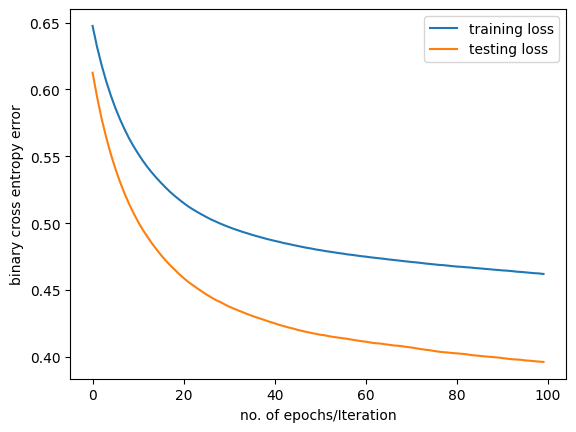

In [47]:
plt.plot(trained_model.history['loss'],label="training loss")
plt.plot(trained_model.history['val_loss'],label="testing loss")
plt.xlabel("no. of epochs/Iteration")
plt.ylabel("binary cross entropy error")
plt.legend()
plt.show()


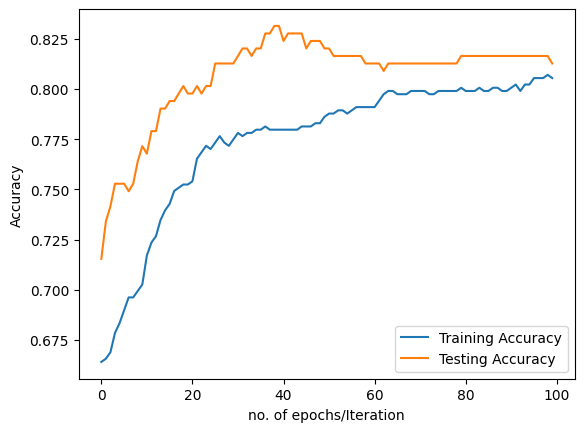

In [48]:
plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.xlabel("no. of epochs/Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
ypred = model.predict(xtest).round(2)
ypred

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.81],
       [0.71],
       [0.06],
       [0.69],
       [0.11],
       [0.9 ],
       [0.7 ],
       [0.36],
       [0.3 ],
       [0.71],
       [0.3 ],
       [0.54],
       [0.22],
       [0.7 ],
       [0.13],
       [0.71],
       [0.16],
       [0.81],
       [0.87],
       [0.58],
       [0.15],
       [0.37],
       [0.14],
       [0.12],
       [0.59],
       [0.68],
       [0.91],
       [0.12],
       [0.07],
       [0.68],
       [0.67],
       [0.7 ],
       [0.8 ],
       [0.68],
       [0.37],
       [0.78],
       [0.4 ],
       [0.07],
       [0.68],
       [0.47],
       [0.6 ],
       [0.13],
       [0.58],
       [0.07],
       [0.2 ],
       [0.8 ],
       [0.88],
       [0.16],
       [0.84],
       [0.07],
       [0.07],
       [0.5 ],
       [0.11],
       [0.9 ],
       [0.21],
       [0.84],
       [0.18],
       [0.4 ],
       [0.26],
       [0.1 ],
       [0.19],
       [0.13],
       [0.36],
       [0.07],
       [0.54],
       [0.7 ],
       [0.

In [50]:
ypred = np.where(ypred>0.5,1,0)
ypred

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [51]:
ac_test = accuracy_score(ytest,ypred)
ac_test

0.8239700374531835

In [54]:
xpred = model.predict(xtrain)
xpred

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.13209623],
       [0.7865784 ],
       [0.07452609],
       [0.13839975],
       [0.13812077],
       [0.8178563 ],
       [0.07511866],
       [0.10749211],
       [0.7624588 ],
       [0.7064314 ],
       [0.67960626],
       [0.42905828],
       [0.5510052 ],
       [0.09488827],
       [0.15385306],
       [0.4772679 ],
       [0.06562886],
       [0.5561317 ],
       [0.45804033],
       [0.49859735],
       [0.43209657],
       [0.88317966],
       [0.5959669 ],
       [0.5511404 ],
       [0.8953573 ],
       [0.08795816],
       [0.18335922],
       [0.19356012],
       [0.67622024],
       [0.3231762 ],
       [0.23410648],
       [0.3276865 ],
       [0.11690631],
       [0.67968786],
       [0.13209623],
       [0.762414  ],
       [0.05058223],
       [0.09310979],
       [0.75835824],
       [0.07452609],
       [0.9127991 ],
       [0.10315782],
       [0.07719535],
       [0.463028  ],
       [0.8582672 ],
       [0.9105302 ],
       [0.06561107],
       [0.596

In [55]:
xpred = np.where(xpred>0.5,1,0)
xpred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [58]:
cm = confusion_matrix(ytest,ypred)
cm

array([[141,  25],
       [ 22,  79]], dtype=int64)

In [59]:
cr = classification_report(ytest,ypred)
print(f"classification report : {cr}")

classification report :               precision    recall  f1-score   support

           0       0.87      0.85      0.86       166
           1       0.76      0.78      0.77       101

    accuracy                           0.82       267
   macro avg       0.81      0.82      0.81       267
weighted avg       0.83      0.82      0.82       267



In [60]:
from tensorflow.keras import regularizers

In [61]:
model = kr.Sequential([
    kr.layers.Dense(units=8,activation="relu",kernel_regularizer=regularizers.l2(0.01),input_shape=(x.shape[1],)),
    kr.layers.Dense(units=1,activation="sigmoid",kernel_regularizer=regularizers.l2(0.01))
])

In [62]:
model.compile(optimizer="sgd",metrics=['accuracy'],loss="binary_crossentropy")

In [63]:
trained_model = model.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest),callbacks=es)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4109 - loss: 0.8970 - val_accuracy: 0.3933 - val_loss: 0.8986
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4239 - loss: 0.8504 - val_accuracy: 0.4270 - val_loss: 0.8542
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4682 - loss: 0.8128 - val_accuracy: 0.4869 - val_loss: 0.8158
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4973 - loss: 0.7927 - val_accuracy: 0.5318 - val_loss: 0.7846
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5586 - loss: 0.7700 - val_accuracy: 0.5655 - val_loss: 0.7582
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6176 - loss: 0.7255 - val_accuracy: 0.6142 - val_loss: 0.7352
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6398 - loss: 0.7164 - val_accuracy: 0.6517 - val_loss: 0.7149
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6844 - loss: 0.6884 - val_accuracy: 0.7228 - v

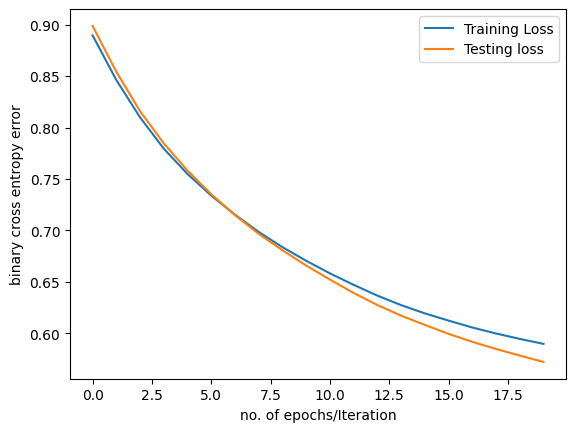

In [64]:
plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Testing loss')
plt.xlabel("no. of epochs/Iteration")
plt.ylabel("binary cross entropy error")
plt.legend()
plt.show()

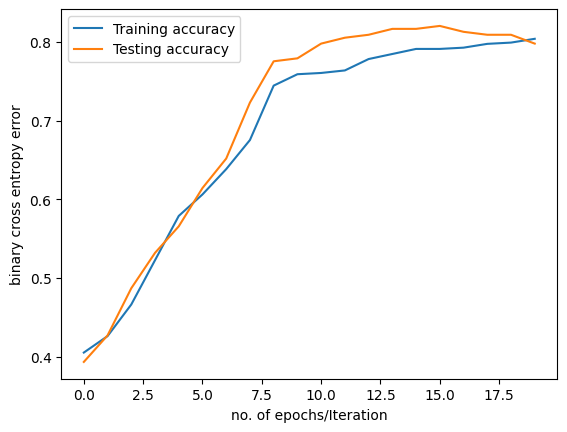

In [65]:
plt.plot(trained_model.history['accuracy'],label='Training accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing accuracy')
plt.xlabel("no. of epochs/Iteration")
plt.ylabel("binary cross entropy error")
plt.legend()
plt.show()

In [66]:
ypred= model.predict(xtest).round(2) #return probability value
ypred

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.55],
       [0.54],
       [0.21],
       [0.45],
       [0.21],
       [0.74],
       [0.43],
       [0.31],
       [0.23],
       [0.44],
       [0.32],
       [0.36],
       [0.24],
       [0.58],
       [0.32],
       [0.43],
       [0.21],
       [0.54],
       [0.61],
       [0.53],
       [0.34],
       [0.41],
       [0.28],
       [0.22],
       [0.53],
       [0.47],
       [0.77],
       [0.31],
       [0.24],
       [0.55],
       [0.47],
       [0.69],
       [0.55],
       [0.68],
       [0.35],
       [0.56],
       [0.49],
       [0.25],
       [0.6 ],
       [0.44],
       [0.6 ],
       [0.25],
       [0.58],
       [0.25],
       [0.26],
       [0.55],
       [0.61],
       [0.24],
       [0.68],
       [0.25],
       [0.25],
       [0.41],
       [0.17],
       [0.75],
       [0.24],
       [0.74],
       [0.23],
       [0.68],
       [0.27],
       [0.17],
       [0.25],
       [0.32],
       [0.36],
       [0.25],
       [0.39],
       [0.6 ],
       [0.

In [67]:
ypred= np.where(ypred>0.5,1,0) #return probability value
ypred

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [68]:
 cm= confusion_matrix(ytest,ypred)
 cm

array([[151,  15],
       [ 35,  66]], dtype=int64)

In [69]:
cr = classification_report(ytest,ypred)
print(f"cr : {cr}")

cr :               precision    recall  f1-score   support

           0       0.81      0.91      0.86       166
           1       0.81      0.65      0.73       101

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267

